In [8]:
import pandas as pd
import numpy as np 
df = pd.read_csv("Desktop/football.csv")
print(df.head())

   Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   

In [9]:
df = df[['Name', 'Age', 'Nationality', 'Value', 'Wage', 'Preferred Foot', 'Height', 'Weight', 'Position', 'Overall']]
print(df.head())

                Name  Age Nationality    Value   Wage Preferred Foot Height  \
0           L. Messi   31   Argentina  €110.5M  €565K           Left    5'7   
1  Cristiano Ronaldo   33    Portugal     €77M  €405K          Right    6'2   
2          Neymar Jr   26      Brazil  €118.5M  €290K          Right    5'9   
3             De Gea   27       Spain     €72M  €260K          Right    6'4   
4       K. De Bruyne   27     Belgium    €102M  €355K          Right   5'11   

   Weight Position  Overall  
0  159lbs       RF       94  
1  183lbs       ST       94  
2  150lbs       LW       92  
3  168lbs       GK       91  
4  154lbs      RCM       91  


In [10]:
Height_cm = []
for i in list(df['Height'].values):
    try:
        Height_cm.append((float(str(i)[0])*12.0 + float(str(i)[2:]))*2.54)
    except(ValueError):
        Height_cm.append(np.nan)
        
df['Height_cm'] = Height_cm

In [11]:
df.dropna(inplace = True)
print(df['Height_cm'].head())

0    170.18
1    187.96
2    175.26
3    193.04
4    180.34
Name: Height_cm, dtype: float64


In [12]:

print("Mean: ", df['Height_cm'].mean())
print("Standard Deviation: ", df['Height_cm'].std())

Mean:  181.2594500468073
Standard Deviation:  6.730334804085826


In [13]:
import seaborn as sns 
sns.set()
df['Height_cm'].hist(bins = 10)

Mean Height_cm:  181.2594500468073
Standard Deviation in Height_cm:  6.730334804085826


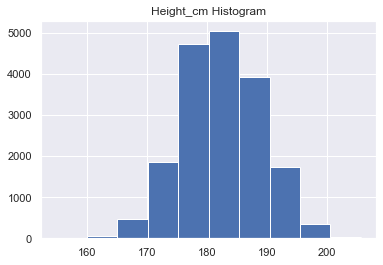

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt
def get_statistics(numeric_column_name):
    print("Mean {}: ".format(numeric_column_name),   df[numeric_column_name].mean())
    print("Standard Deviation in {}: ".format(numeric_column_name), df[numeric_column_name].std())
    sns.set()
    plt.title("{} Histogram".format(numeric_column_name))
    df[numeric_column_name].hist(bins = 10)
    
get_statistics('Height_cm')

In [16]:
df['Weight_kg'] = df['Weight'].str[:3].astype(float)/2.20462
print(df.head())

                Name  Age Nationality    Value   Wage Preferred Foot Height  \
0           L. Messi   31   Argentina  €110.5M  €565K           Left    5'7   
1  Cristiano Ronaldo   33    Portugal     €77M  €405K          Right    6'2   
2          Neymar Jr   26      Brazil  €118.5M  €290K          Right    5'9   
3             De Gea   27       Spain     €72M  €260K          Right    6'4   
4       K. De Bruyne   27     Belgium    €102M  €355K          Right   5'11   

   Weight Position  Overall  Height_cm  Weight_kg  
0  159lbs       RF       94     170.18  72.121273  
1  183lbs       ST       94     187.96  83.007502  
2  150lbs       LW       92     175.26  68.038936  
3  168lbs       GK       91     193.04  76.203609  
4  154lbs      RCM       91     180.34  69.853308  


Mean Weight_kg:  75.28869936411941
Standard Deviation in Weight_kg:  7.073050073247245


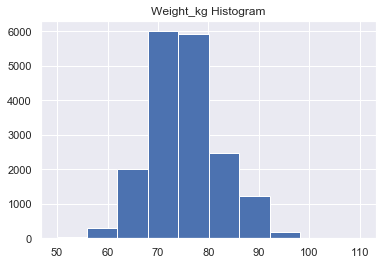

In [17]:
get_statistics('Weight_kg')\

In [18]:
from collections import Counter
print(Counter(df['Nationality'].values))

Counter({'England': 1657, 'Germany': 1195, 'Spain': 1071, 'Argentina': 936, 'France': 911, 'Brazil': 825, 'Italy': 699, 'Colombia': 616, 'Japan': 478, 'Netherlands': 452, 'Sweden': 396, 'China PR': 390, 'Chile': 388, 'Republic of Ireland': 368, 'Mexico': 365, 'United States': 353, 'Poland': 348, 'Norway': 341, 'Saudi Arabia': 337, 'Denmark': 335, 'Korea Republic': 333, 'Portugal': 322, 'Turkey': 303, 'Austria': 296, 'Scotland': 283, 'Belgium': 259, 'Australia': 236, 'Switzerland': 220, 'Uruguay': 149, 'Senegal': 130, 'Wales': 129, 'Croatia': 126, 'Serbia': 126, 'Nigeria': 121, 'Ghana': 114, 'Greece': 102, 'Czech Republic': 100, 'Ivory Coast': 100, 'Cameroon': 90, 'Morocco': 85, 'Paraguay': 84, 'Russia': 79, 'Northern Ireland': 79, 'Ukraine': 73, 'South Africa': 71, 'Finland': 67, 'Venezuela': 66, 'Canada': 64, 'Bosnia Herzegovina': 61, 'Algeria': 60, 'Slovenia': 55, 'Slovakia': 54, 'Romania': 54, 'DR Congo': 52, 'Iceland': 47, 'New Zealand': 44, 'Ecuador': 43, 'Mali': 43, 'Albania': 39

In [19]:
print(Counter(df['Nationality'].values).most_common(5))

[('England', 1657), ('Germany', 1195), ('Spain', 1071), ('Argentina', 936), ('France', 911)]


In [20]:
def plot_most_common(category):
    bar_plot = dict(Counter(df[category].values).most_common(5))
    plt.bar(*zip(*bar_plot.items()))
    plt.show()

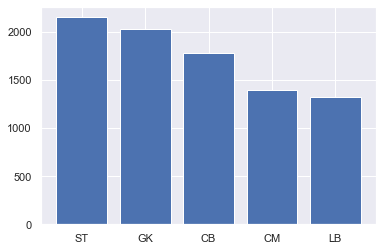

In [21]:
plot_most_common('Position')

In [22]:
value_list = []
for i in list(df['Value'].values):
    try:
        value_list.append(float(i)*1e6)
    except(ValueError):
        value_list.append(np.nan)
df['Value_numeric'] = value_list

In [23]:
wage_list = []
for i in list(df['Wage'].values):
    try:
        wage_list.append(float(i)*1e3)
    except(ValueError):
        wage_list.append(np.nan)
df['Wage_numeric'] = wage_list

In [24]:
df['Age'] = df['Age'].astype(int)

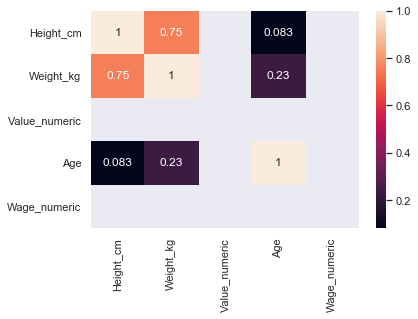

In [25]:
numerical_columns = df[['Height_cm', 'Weight_kg', 'Value_numeric', 'Age', 'Wage_numeric']]
sns.heatmap(numerical_columns.corr(), annot=True)
plt.show()

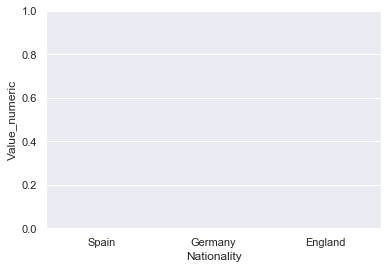

In [26]:
df = df[df['Nationality'].isin(['England', 'Germany', 'Spain'])]
sns.boxplot(x= df['Nationality'], y = df['Value_numeric'])
plt.show()

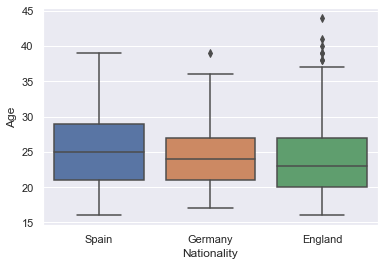

In [27]:
sns.boxplot(x= df['Nationality'], y = df['Age'])
plt.show()

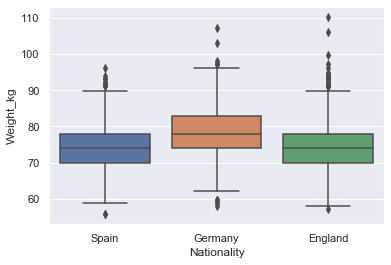

In [28]:
sns.boxplot(x= df['Nationality'], y = df['Weight_kg'])
plt.show()

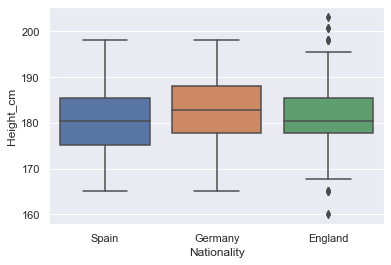

In [29]:
sns.boxplot(x= df['Nationality'], y = df['Height_cm'])
plt.show()